In [4]:
#!/usr/bin/env python3
#### Import all the required libraries
import pandas as pd #### Library for working with large datsets
import numpy as np #### Library for performing numerical calculations
import seaborn as sns #### Library for plotting graphs. This is a layer on top of matplotlib
import matplotlib.pyplot as plt #### Basic Library for plotting graphs
#### Configuring Matplotlib to show Plots inline
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 12) ### Setting the size of the Plots

In [5]:
#### Load the Data File
data = pd.read_csv('https://raw.githubusercontent.com/pracasrv/machine-learning-getting-started-ws/master/data/Sample_Data.csv')
print(data)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Germany  40.0      NaN       Yes
5    France  35.0  58000.0       Yes
6     Spain   NaN  52000.0        No
7    France  48.0  79000.0       Yes
8   Germany  50.0  83000.0        No
9    France  37.0  67000.0       Yes
10    India   NaN  78000.0        No
11    India  28.0      NaN       Yes
12    Spain  36.0  56000.0       Yes
13   France  42.0  70000.0       Yes
14  Germany  50.0  86000.0        No
15    India  30.0  90000.0       Yes


In [6]:
#### Check the General Information about the loaded dataset
print(data.info()) ### Float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
Country      16 non-null object
Age          14 non-null float64
Salary       14 non-null float64
Purchased    16 non-null object
dtypes: float64(2), object(2)
memory usage: 592.0+ bytes
None


In [7]:
#### Check Data Description Overview
print(data.describe())

             Age        Salary
count  14.000000     14.000000
mean   38.214286  68142.857143
std     7.875752  13643.015361
min    27.000000  48000.000000
25%    31.250000  56500.000000
50%    37.500000  68500.000000
75%    43.500000  78750.000000
max    50.000000  90000.000000


#### ##### Handling Missing Values - We have missing Values in 2 Columns Age & Salary


In [8]:
#### Lets fix the missing Age with respect to the Mean value for Age
mean = np.mean(data.Age)
data.Age = data.Age.fillna(mean)
print(data)

    Country        Age   Salary Purchased
0    France  44.000000  72000.0        No
1     Spain  27.000000  48000.0       Yes
2   Germany  30.000000  54000.0        No
3     Spain  38.000000  61000.0        No
4   Germany  40.000000      NaN       Yes
5    France  35.000000  58000.0       Yes
6     Spain  38.214286  52000.0        No
7    France  48.000000  79000.0       Yes
8   Germany  50.000000  83000.0        No
9    France  37.000000  67000.0       Yes
10    India  38.214286  78000.0        No
11    India  28.000000      NaN       Yes
12    Spain  36.000000  56000.0       Yes
13   France  42.000000  70000.0       Yes
14  Germany  50.000000  86000.0        No
15    India  30.000000  90000.0       Yes


In [9]:
#### Lets use an inbuilt function interpolate to fix the salary mixing values
data.Salary = data.Salary.interpolate()

In [10]:
print(data)

    Country        Age   Salary Purchased
0    France  44.000000  72000.0        No
1     Spain  27.000000  48000.0       Yes
2   Germany  30.000000  54000.0        No
3     Spain  38.000000  61000.0        No
4   Germany  40.000000  59500.0       Yes
5    France  35.000000  58000.0       Yes
6     Spain  38.214286  52000.0        No
7    France  48.000000  79000.0       Yes
8   Germany  50.000000  83000.0        No
9    France  37.000000  67000.0       Yes
10    India  38.214286  78000.0        No
11    India  28.000000  67000.0       Yes
12    Spain  36.000000  56000.0       Yes
13   France  42.000000  70000.0       Yes
14  Germany  50.000000  86000.0        No
15    India  30.000000  90000.0       Yes


#### ####  - Lets See How a Pair of Variables is distributed in relation to each other

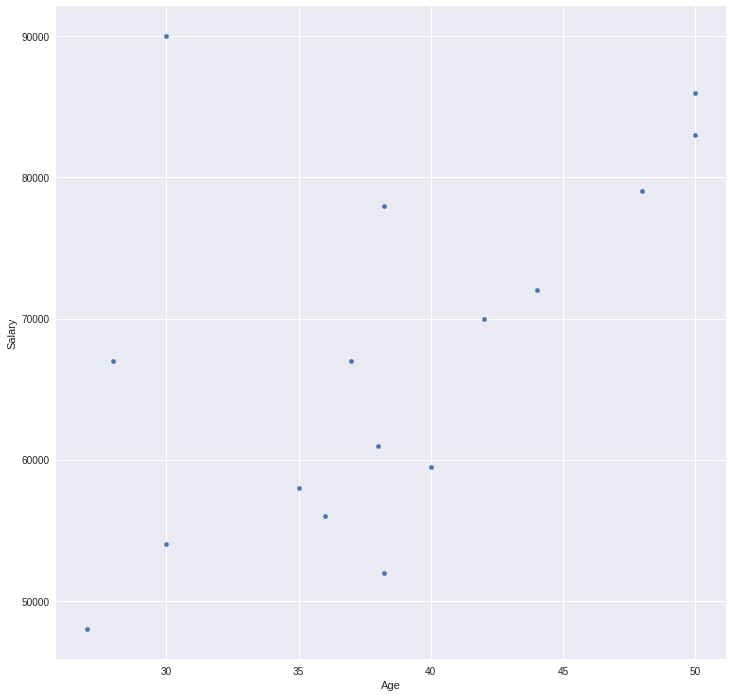

In [11]:
#### Lets use a scatter plot to see how Age and Salary are distributed
data.plot.scatter(x='Age', y='Salary')

In [12]:
### lets drop all the dummy data we added - the last 6 records
data = pd.read_csv('Sample_Data.csv')
data = data[:-6]
print(data)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [13]:
#Lets compute mean of the missing values
#### by their respective countries and see how the graph comes out
mean_ages = data.groupby('Country').Age.mean()

data.Age = data.Age.fillna(mean_ages.Spain)
print(data)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain  32.5  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [14]:
mean_salary = data.groupby('Country').Salary.mean()
data.Salary = data.Salary.fillna(mean_salary.Germany)
print(data)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0  68500.0       Yes
5   France  35.0  58000.0       Yes
6    Spain  32.5  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


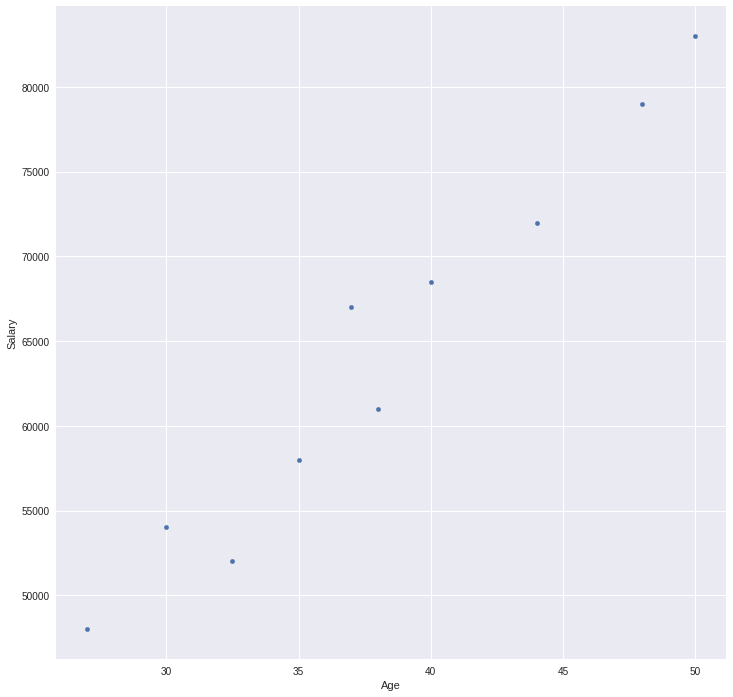

In [15]:
data.plot.scatter(x='Age', y='Salary')

###  One Hot Encoding
Replace categorical values by creating new columns and creating a binary representation

##### Lets replace the Country Values with their corresponding one hot encoded values

In [16]:
#### First lets extract the one hot encoded columns into a new data_frame called one_hot
one_hot_data = pd.get_dummies(data['Country'])
print(one_hot_data)

   France  Germany  Spain
0       1        0      0
1       0        0      1
2       0        1      0
3       0        0      1
4       0        1      0
5       1        0      0
6       0        0      1
7       1        0      0
8       0        1      0
9       1        0      0


In [17]:
#### Next lets drop the country row from our data frame
data = data.drop('Country',1)
#### and add the new dataframe to our existing dataframe
data = data.join(one_hot_data)
print(data)

    Age   Salary Purchased  France  Germany  Spain
0  44.0  72000.0        No       1        0      0
1  27.0  48000.0       Yes       0        0      1
2  30.0  54000.0        No       0        1      0
3  38.0  61000.0        No       0        0      1
4  40.0  68500.0       Yes       0        1      0
5  35.0  58000.0       Yes       1        0      0
6  32.5  52000.0        No       0        0      1
7  48.0  79000.0       Yes       1        0      0
8  50.0  83000.0        No       0        1      0
9  37.0  67000.0       Yes       1        0      0
